# Regresion Models: Prediction of the value of Tesla's stock

## Abstract

Starting with a data set containing close to a year of historical data related to Tesla's stock movements, in this notebook we will attempt to predict the next five days' worth of this stock. The dataset was downloaded from the Yahoo! Finance (for historical Tesla data: <a href='https://es.finance.yahoo.com/quote/TSLA/history?p=TSLA'>click here</a>).<br>
Different prediction models were used: simple linear model, simple polynomial model and multiple linear model. All models come with indicators like R2 and RMSE.

## 1. Exploratory Data Analysis

### 1.1. Getting the Dataset

#### Libreries

In [25]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from math import sqrt

#### The dataset

In [26]:
# The complete dataset
data=pd.read_csv('datasets/TSLA.csv')
# Drop of columns: 'Date' y 'Adj Close'
ds=data.drop(['Adj Close'], axis=1)
# Number of days of prediction
periodos=5
# Global Dataset train and test
dsTrain=ds.iloc[:(len(ds)-periodos),:]
dsTest=ds.iloc[(len(ds)-periodos):,:]
# Simple Data Train: For linear and Polynomial models
dsTrainS=dsTrain.drop(['Open','High','Low','Volume'], axis=1)
# Simple Data Test:
dsTestS=dsTest.drop(['Open','High','Low','Volume'], axis=1)

### 1.2. Univariate Analysis

In [27]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-03-15,694.090027,713.179993,684.039978,707.940002,707.940002,29335600
1,2021-03-16,703.349976,707.919983,671.000000,676.880005,676.880005,32195700
2,2021-03-17,656.869995,703.729980,651.010010,701.809998,701.809998,40372500
3,2021-03-18,684.289978,689.229980,652.000000,653.159973,653.159973,33224800
4,2021-03-19,646.599976,657.229980,624.619995,654.869995,654.869995,42894000
...,...,...,...,...,...,...,...
248,2022-03-08,795.530029,849.989990,782.169983,824.400024,824.400024,26799700
249,2022-03-09,839.479980,860.559998,832.010010,858.969971,858.969971,19728000
250,2022-03-10,851.450012,854.450012,810.359985,838.299988,838.299988,19549500
251,2022-03-11,840.200012,843.799988,793.770020,795.349976,795.349976,22272800


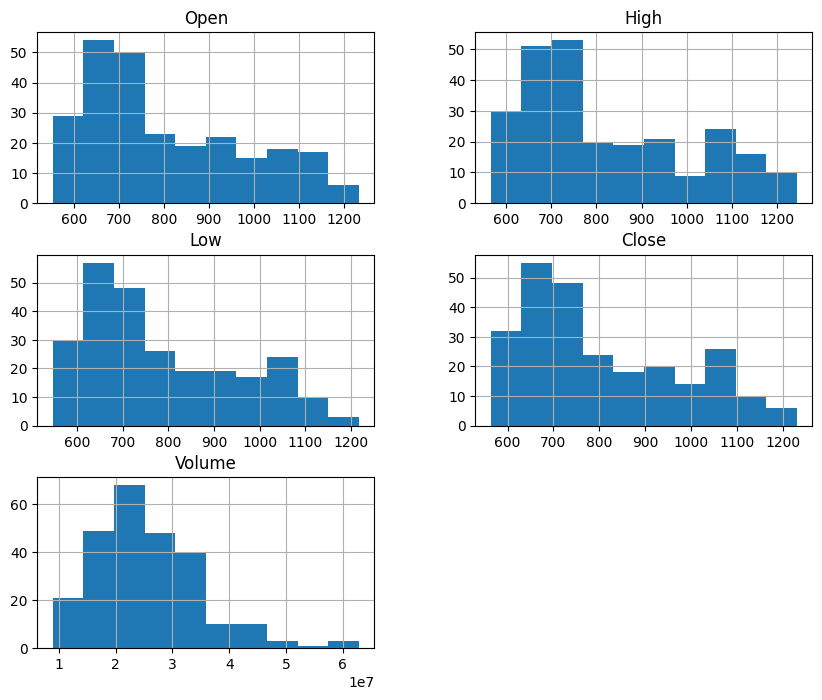

In [28]:
# Hystograms of independent variables
ds.hist(figsize=(10,8))
plt.show()

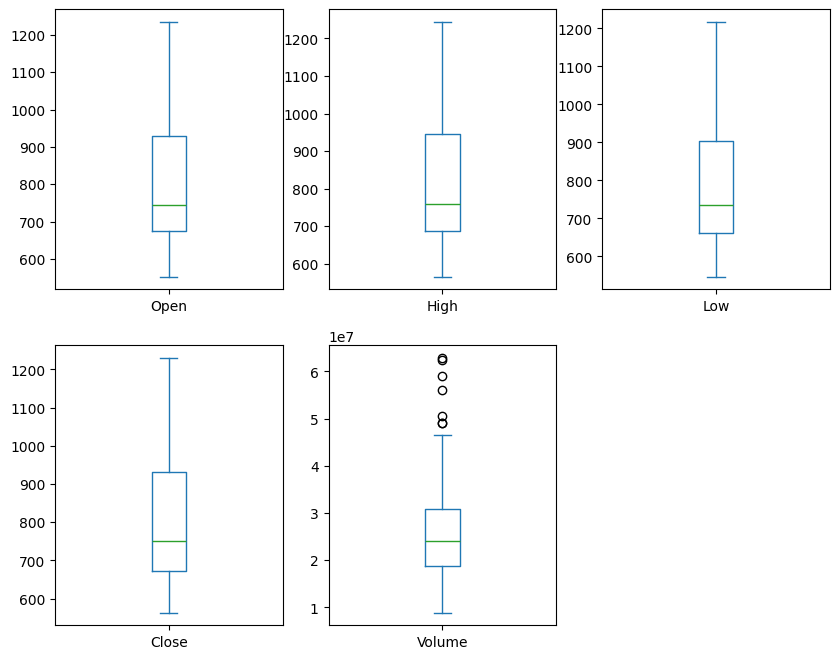

In [5]:
ds.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False,figsize=(10,8))
plt.show()

Note than there are a couple of abnormal data shown in the graphic of Volume (small circles)

            Open      High       Low     Close    Volume
Open    1.000000  0.995803  0.993779  0.987110  0.107676
High    0.995803  1.000000  0.994400  0.994272  0.147882
Low     0.993779  0.994400  1.000000  0.995196  0.073231
Close   0.987110  0.994272  0.995196  1.000000  0.116150
Volume  0.107676  0.147882  0.073231  0.116150  1.000000


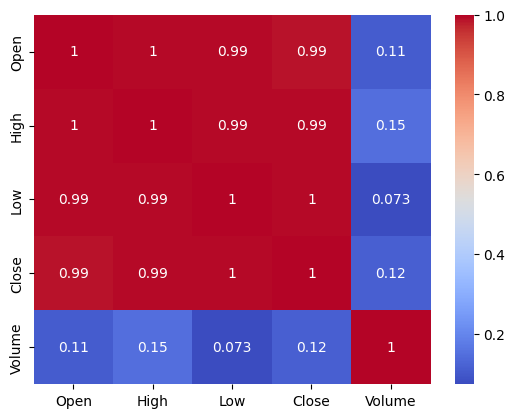

In [29]:
# Correlation Matrix
import seaborn as sns
correlacion = ds.drop(['Date'], axis=1).corr()
print(correlacion)
sns.heatmap(correlacion, annot=True, cmap='coolwarm')
plt.show()

## 2. Regresion Models

The variable to predict is the stock's closing value. For each model, the following will be carried out: training (and graphs as far as possible), obtaining metrics and predicting the value of the action for the following days. The result of the predictions is compared with the actual results in order to understand the quality of the predictions.

### 2.1. Simple Linear Regresion Model

In [30]:
x=np.array([])
y=np.array([])
for i in range(len(dsTrainS)):
    x=np.append(x,i)
    y=np.append(y,dsTrainS.iloc[i,1])
# Training:
modelo = LinearRegression() # instance of LinearRegression
modelo.fit(x.reshape(-1,1), y.reshape(-1,1))

LinearRegression()

#### Graphics of the Model

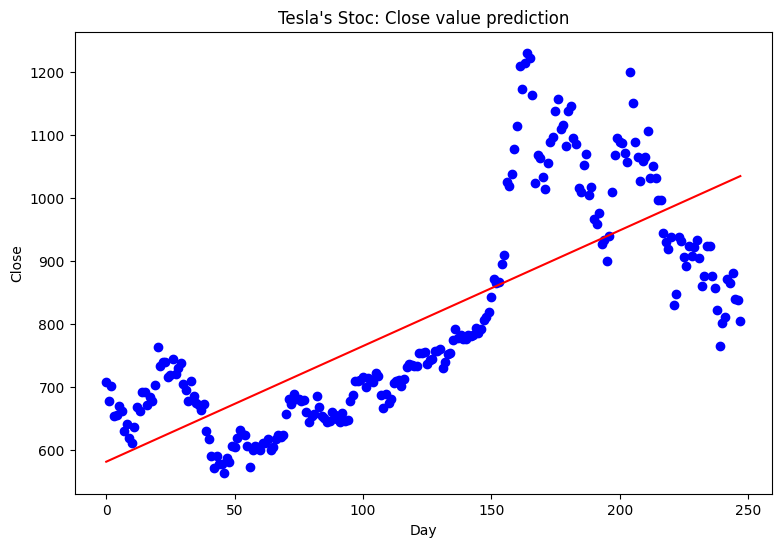

In [31]:
def graficar(df):
    campos=df.columns.tolist()
    x=np.array([])
    y=np.array([])
    for i in range(len(df)):
        x=np.append(x,i)
        y=np.append(y,df.iloc[i,1])
    modelo = LinearRegression() 
    modelo.fit(x.reshape(-1,1), y.reshape(-1,1))
    y_pred=np.array([])
    y_pred=np.append(y_pred,modelo.predict(x.reshape(-1,1)))                        
    plt.figure(figsize=(9,6))
    plt.plot(x, y_pred, label="Simple Linear Model",color = "red")
    plt.scatter(x,y,label='datos', color='blue')
    plt.title("Tesla's Stoc: Close value prediction")
    plt.xlabel('Day')
    plt.ylabel(campos[1])
    return
graficar(dsTrainS)

#### Formula & Metrics:

In [33]:
# Formula: y = mx + b
m=round(modelo.coef_[0][0],3)
b=round(modelo.intercept_[0],2)
formula='y = '+str(m)+'x + '+str(b)
print('Formula: ',formula)    
# Testing of the model:
print('Testing:')
x=np.array([])
y=np.array([])
for i in range(len(dsTrainS)):
    x=np.append(x,i)
    y=np.append(y,dsTrainS.iloc[i,1])
y_pred=np.array([])
y_pred=np.append(y_pred.reshape(-1,1),modelo.predict(x.reshape(-1,1)))                        
r2=r2_score(y.reshape(-1,1),y_pred.reshape(-1,1))
print('R2=',r2)
# RMSE
xPlus=np.array([])
yPlus=np.array([])
for i in range(len(dsTest)):
    xPlus=np.append(xPlus,i+len(dsTrain))
    yPlus=np.append(yPlus,dsTest.iloc[i,1])
y_predPlus=np.array([])
y_predPlus=np.append(y_predPlus,modelo.predict(xPlus.reshape(-1,1)))                        
RMSE=sqrt(mean_squared_error(yPlus, y_predPlus))
print('RMSE=',RMSE)

Formula:  y = 1.835x + 580.94
Testing:
R2= 0.5713974508525748
RMSE= 220.07654723628073


#### Predictions

Historic data is painted in grey, Real "future" data in blue, and in red: the predictions.

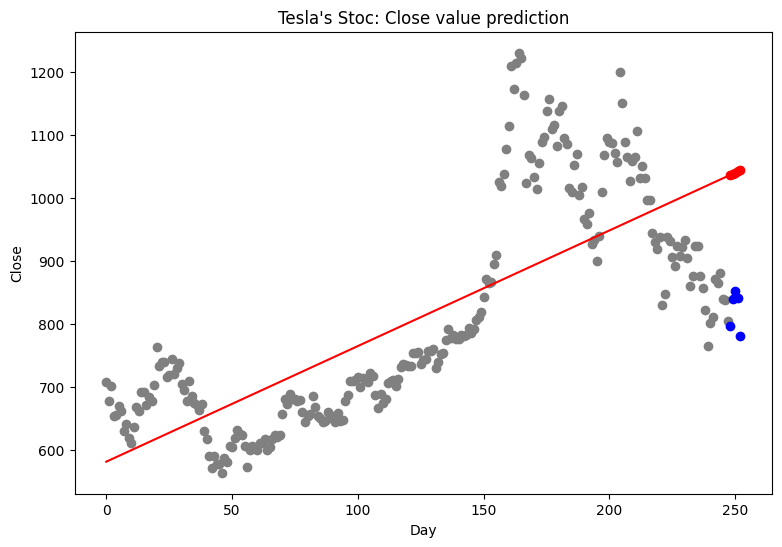

In [34]:
def graphicPrediction(dsTrain,dsTest):
    campos=dsTrain.columns.tolist()
    x=np.array([])
    y=np.array([])
    xPlus=np.array([])
    yPlus=np.array([])
    for i in range(len(dsTrain)):
        x=np.append(x,i)
        y=np.append(y,dsTrain.iloc[i,1])
    for i in range(len(dsTest)):
        xPlus=np.append(xPlus,i+len(dsTrain))
        yPlus=np.append(yPlus,dsTest.iloc[i,1])
    modelo = LinearRegression() 
    modelo.fit(x.reshape(-1,1), y.reshape(-1,1))
    y_pred=np.array([])
    y_predPlus=np.array([])
    y_pred=np.append(y_pred,modelo.predict(x.reshape(-1,1)))                        
    y_predPlus=np.append(y_predPlus,modelo.predict(xPlus.reshape(-1,1)))                        
    plt.figure(figsize=(9,6))
    plt.plot(x, y_pred, label="Simple Linear Model",color = "red")
    plt.scatter(x,y,label='Train data', color='grey')
    plt.scatter(xPlus, y_predPlus, label="Predictions",color = "red")
    plt.scatter(xPlus,yPlus,label='Test data', color='blue')
    plt.title("Tesla's Stoc: Close value prediction")
    plt.xlabel('Day')
    plt.ylabel(campos[1])
    return
graphicPrediction(dsTrainS,dsTest)

### 2.2. Simple Polynomial Regression Model

Simple polynomial Regresion Models are polynomic functions (just in one variable) with degree > 1. We will fit the model with Training data. A graph (describing data and the model) is presented.

In [45]:
grado=3
print('Polynomial approximation of degree: ',grado)
poli = PolynomialFeatures(degree=grado, include_bias=False)
x_poli = poli.fit_transform(x.reshape(-1,1))
modelo = LinearRegression()
modelo.fit(x_poli, y.reshape(-1,1))
# Formula: y = a + b1x1 + b2x2 + ... + bnxn
x=np.array([])
y=np.array([])
for i in range(len(dsTrain)):
    x=np.append(x,i)
    y=np.append(y,dsTrain.iloc[i,1])
m=(modelo.coef_[0])
b=round(modelo.intercept_[0],2)
formula='y='+str(b)
for i in range(len(m)):
    formula=str(formula)+'+'+str(round(m[i],3))+'*x(exp '+str(i+1)+')'
print('Formula: ')    
print(formula)    

Polynomial approximation of degree:  3
Formula: 
y=797.0+-8.858*x(exp 1)+0.109*x(exp 2)+-0.0*x(exp 3)


#### Graphics of the model

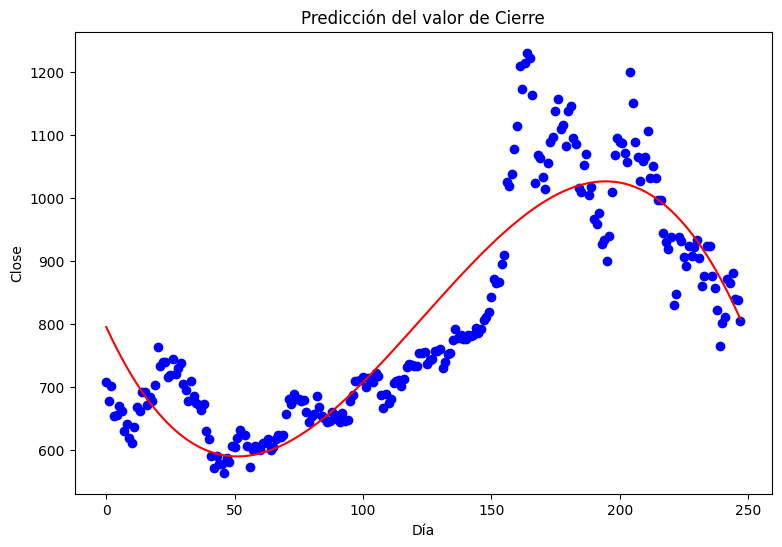

In [46]:
def graphics(df,grado):
    campos=df.columns.tolist()
    x=np.array([])
    y=np.array([])
    for i in range(len(df)):
        x=np.append(x,i)
        y=np.append(y,df.iloc[i,1])
    poli = PolynomialFeatures(degree=grado, include_bias=False)
    x_poli = poli.fit_transform(x.reshape(-1,1))
    modelo = LinearRegression()
    modelo.fit(x_poli, y.reshape(-1,1))
    y_pred=np.array([])
    x_poli = poli.fit_transform(x.reshape(-1,1))
    y_pred=np.append(y_pred,modelo.predict(x_poli))
    plt.figure(figsize=(9,6))
    plt.plot(x, y_pred, label="Modelo Polinomial",color = "red")
    plt.scatter(x,y,label='datos', color='blue')
    plt.title('Predicción del valor de Cierre')
    plt.xlabel('Día')
    plt.ylabel(campos[1])
    return
graphics(dsTrainS,grado)

#### Evaluación del modelo

In [47]:
# Evaluación del modelo:
print('Evaluación:')
x=np.array([])
y=np.array([])
for i in range(len(dsTrain)):
    x=np.append(x,i)
    y=np.append(y,dsTrain.iloc[i,1])
y_pred=np.array([])
x_poli = poli.fit_transform(x.reshape(-1,1))
y_pred=np.append(y_pred,modelo.predict(x_poli))
xPlus=np.array([])
yPlus=np.array([])
for i in range(len(dsTest)):
    xPlus=np.append(xPlus,i+len(dsTrain))
    yPlus=np.append(yPlus,dsTest.iloc[i,1])
y_predPlus=np.array([])
x_poli = poli.fit_transform(xPlus.reshape(-1,1))
y_predPlus=np.append(y_predPlus,modelo.predict(x_poli))
# R2:
r2 = r2_score(y.reshape(-1,1),y_pred.reshape(-1,1))
print('R2=',r2)
# RMSE:
RMSE=sqrt(mean_squared_error(yPlus, y_predPlus))
print('RMSE=',RMSE)

Evaluación:
R2= 0.8092738717035443
RMSE= 44.045988069287844


#### Graficar Predicciones

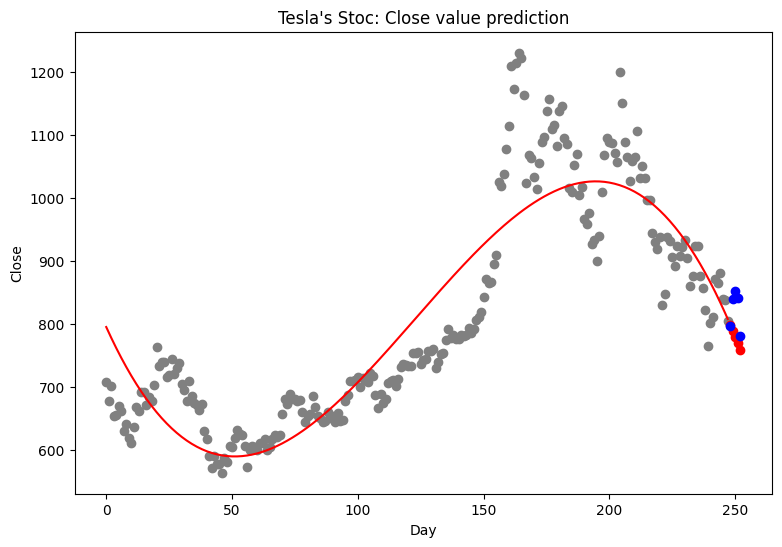

In [48]:
def graficarPrediccion(dsTrain,dsTest,grado):
    campos=dsTrain.columns.tolist()
    x=np.array([])
    y=np.array([])
    xPlus=np.array([])
    yPlus=np.array([])
    for i in range(len(dsTrain)):
        x=np.append(x,i)
        y=np.append(y,dsTrain.iloc[i,1])
    for i in range(len(dsTest)):
        xPlus=np.append(xPlus,i+len(dsTrain))
        yPlus=np.append(yPlus,dsTest.iloc[i,1])   
    poli = PolynomialFeatures(degree=grado, include_bias=False)
    x_poli = poli.fit_transform(x.reshape(-1,1))
    modelo = LinearRegression()
    modelo.fit(x_poli, y.reshape(-1,1))
    y_pred=np.array([])
    y_pred=np.append(y_pred,modelo.predict(x_poli))
    x_poliPlus = poli.fit_transform(xPlus.reshape(-1,1))
    y_predPlus=np.array([])
    y_predPlus=np.append(y_predPlus,modelo.predict(x_poliPlus))
    plt.figure(figsize=(9,6))
    plt.plot(x, y_pred, label="Model: Simple-Polynomial",color = "red")
    plt.scatter(x,y,label='Train data', color='grey')
    plt.scatter(xPlus, y_predPlus, label="Predicciones",color = "red")
    plt.scatter(xPlus,yPlus,label='Test data', color='blue')
    plt.title("Tesla's Stoc: Close value prediction")
    plt.xlabel('Day')
    plt.ylabel(campos[1])
    return
graficarPrediccion(dsTrainS,dsTest,grado)

### 2.3. Multiple Linear Regression

Multiple Linear Regression Models are linear models that uses several variables. In this way, the contribution of other variables can be used.

#### The Model

In [49]:
Y=dsTrain['Close'].values
x=(dsTrain.drop(['Date','Close'], axis=1))
X=x.values
camposX=x.columns.tolist()
# Training
modelo_RLM = LinearRegression() # instance de LinearRegression
modelo_RLM.fit(X, Y)
# Formula
coefs=[]
for i in range(len(camposX)):
    a=round(modelo_RLM.coef_[i],4)
    coefs.append(a)
c=round(modelo_RLM.intercept_,2)
formula='Close'+'='
for i in range(len(camposX)):
    formula=formula+str(coefs[i])+'*'+str(camposX[i])+'+'
formula=formula+str(c)        
print('Formula: ')
print(formula)

Formula: 
Close=-0.693*Open+0.8422*High+0.8515*Low+0.0*Volume+-0.75


#### Testing the model

In [51]:
# Test:
# R2
print('Testing:')
r2=modelo_RLM.score(X,Y)
print('R2=',r2)
# RMSE
y_plus=dsTest['Close'].values
x_plus=(dsTest.drop(['Date','Close'], axis=1))
X_plus=x_plus.values
y_pred=np.array([])
y_pred=np.append(y_pred,modelo_RLM.predict(X_plus))                        
RMSE=sqrt(mean_squared_error(y_plus, y_pred))
print('RMSE=',RMSE)
print('')
print('Real_Values=',y_plus)
print('Predicted_values=',y_pred)

Testing:
R2= 0.9959497035353914
RMSE= 10.649784122723823

Real_Values= [824.400024 858.969971 838.299988 795.349976 783.02002 ]
Predicted_values= [830.92269877 851.487741   819.60409568 804.42711211 776.96777516]


### 2.4. Random Forest Regressor
#### Training model

In [53]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
# Asumo que las variables dsTrain, dsTest y sus columnas ya están cargadas.

# Variables:
# Y: variable dependiente (Target)
Y = dsTrain['Close'].values

# X: variables independientes (Features)
x = (dsTrain.drop(['Date', 'Close'], axis=1))
X = x.values
camposX = x.columns.tolist()

# --- Entrenamiento del modelo Random Forest Regressor ---
# Instancia del modelo RandomForestRegressor
# Puedes ajustar hiperparámetros como n_estimators (número de árboles)
modelo_RF = RandomForestRegressor(n_estimators=100, # 100 árboles por defecto
                                  random_state=42, # Para reproducibilidad
                                  n_jobs=-1)       # Usa todos los núcleos disponibles

# Entrenamiento
modelo_RF.fit(X, Y)

print('--- Modelo Random Forest Regressor Entrenado ---')

# Puedes evaluar la importancia de las variables (features)
importancias = modelo_RF.feature_importances_
nombres_variables = x.columns

# Crea un DataFrame o lista para ver la importancia
importancia_df = sorted(zip(nombres_variables, importancias), key=lambda x: x[1], reverse=True)

print('\nImportancia de las Variables (Features):')
for nombre, importancia in importancia_df:
    print(f'- {nombre}: {importancia:.4f}')

--- Modelo Random Forest Regressor Entrenado ---

Importancia de las Variables (Features):
- Low: 0.6403
- High: 0.3553
- Open: 0.0034
- Volume: 0.0010


#### Testing models

In [54]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
from math import sqrt

# Asegúrate de que las variables dsTrain, dsTest y modelo_RF están disponibles
# (asumo que ejecutaste el script de entrenamiento de RF anterior)

# --- Preparación de datos de prueba (Test) ---
# Y_plus: Variable dependiente real del conjunto de prueba
y_plus = dsTest['Close'].values

# X_plus: Variables independientes del conjunto de prueba
x_plus = (dsTest.drop(['Date', 'Close'], axis=1))
X_plus = x_plus.values

# --- Evaluación del Modelo Random Forest (modelo_RF) ---
print('--- Evaluación del Modelo Random Forest Regressor ---')

# 1. Predicción
y_pred_rf = modelo_RF.predict(X_plus)

# 2. R2 (Coeficiente de Determinación)
# Nota: Aquí usamos el R2 del set de prueba (X_plus, y_plus), no del set de entrenamiento (X, Y)
r2_rf = r2_score(y_plus, y_pred_rf)
print('R2 (Test) =', round(r2_rf, 4))

# 3. RMSE (Root Mean Squared Error)
RMSE_rf = sqrt(mean_squared_error(y_plus, y_pred_rf))
print('RMSE (Test) =', round(RMSE_rf, 4))
print('')

# 4. Presentación de Resultados
# Asegúrate de que las impresiones muestren los valores predichos por RF
print('Real_Values =', y_plus)
print('Predicted_values (RF) =', y_pred_rf)

--- Evaluación del Modelo Random Forest Regressor ---
R2 (Test) = 0.6727
RMSE (Test) = 15.8719

Real_Values = [824.400024 858.969971 838.299988 795.349976 783.02002 ]
Predicted_values (RF) = [812.725103   838.83909297 824.94060593 818.450401   780.58659296]


## 3. Conclussion

The model that shows better indicators of the prediction of the closing value of the stocks of Tesla is the Multiple Linear Regresion Model with incredible indicators:

In [55]:
print('R2=',r2,' - RMSE=',RMSE)

R2= 0.9959497035353914  - RMSE= 10.649784122723823
